<a href="https://colab.research.google.com/github/juanignaciogiacobbe/7506R-2C2023-GRUPO15/blob/main/7506R_TP1_GRUPO15_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Reservas de Hotel</center>
### <center> Grupo número 15</center>
### <center> Giacobbe, Juan Ignacio; alumno2; alumno3</center>


#Checkpoint 1: Análisis exploratorio y Preprocesamiento de Datos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Comenzamos importando todas las librerías que vamos a utilizar en el proyecto

In [2]:
#Para análisis de los datos
import pandas as pd
import numpy as np

#Para visualizaciones
import seaborn as sns
from matplotlib import pyplot as plt

Cargamos los archivos csv de datos en dos DataFrames de Pandas

In [4]:
ds_hoteles_test = pd.read_csv('./hotels_test.csv')
ds_hoteles_train = pd.read_csv('./hotels_train.csv')

Vamos a empezar viendo qué forma tiene el dataset, cuántas variables tiene y qué describe cada campo, de esta forma podemos saber de antemano con qué nos enfrentamos.

Vemos información sobre las 2 primeras filas del DataFrame

In [ ]:
ds_hoteles_train.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1.0
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0.0


Vemos información de las últimas 2 filas del DataFrame

In [ ]:
ds_hoteles_train.tail(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
33153,City Hotel,166,2016,November,45,1,0,3,1,0.0,...,Non Refund,236.0,NaN,0,Transient,110.0,0,0,8e64e507-39ff-4342-a7a9-70c8600ac2dd,1.0
33154,City Hotel,203,2017,July,28,10,2,5,2,0.0,...,No Deposit,9.0,NaN,0,Transient,107.1,0,1,4698,NaN


Vemos cuántas filas y cuántas columnas tiene el DataFrame

In [5]:
ds_hoteles_train.shape

(61913, 31)

Se tienen 61913 filas y 30 columnas. En otras palabras, contamos con datos correspondientes a 61913 reservas, en las cuales tenemos 31 variables sobre las mismas.

Listamos todos los nombres de las columnas del DataFrame

In [ ]:
ds_hoteles_train.columns.tolist()

['hotel',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'id',
 'is_canceled']

A partir de lo anteriormente visto, ahora nos interesa saber qué tipos de datos contienen las columnas del DataFrame

In [ ]:
ds_hoteles_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

Nos interesa saber también si hay datos faltantes, para ver si en algún futuro podemos hacer una limpieza

In [7]:
print(ds_hoteles_train.isna().sum())

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


Vemos que la variable 'company' es la que tiene más datos faltantes, más adelante volveremos a tener este dato en cuenta.

Siguiendo la idea anterior, ahora veamos cuántos datos no nulos tenemos por columna

In [6]:
print(ds_hoteles_train.count())

hotel                             61913
lead_time                         61913
arrival_date_year                 61913
arrival_date_month                61913
arrival_date_week_number          61913
arrival_date_day_of_month         61913
stays_in_weekend_nights           61913
stays_in_week_nights              61913
adults                            61913
children                          61909
babies                            61913
meal                              61913
country                           61692
market_segment                    61913
distribution_channel              61913
is_repeated_guest                 61913
previous_cancellations            61913
previous_bookings_not_canceled    61913
reserved_room_type                61913
assigned_room_type                61913
booking_changes                   61913
deposit_type                      61913
agent                             54023
company                            3152
days_in_waiting_list              61913


Observamos que la gran mayoría de campos no tienen datos faltantes, hay muy pocas columnas que les faltan datos.



---

# Variable hotel
Esta columna representa al tipo de hotel en el cual se realizó la reserva. El tipo de dato de esta columna es de tipo object, por lo que sospechamos que es una variable del tipo cualitativa, entonces procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son.

Vemos los valores que toma esta variable

In [21]:
columna_hotel = ds_hoteles_train['hotel']
columna_hotel.value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

Nos apoyamos en un grafico de barras para ver la distribucion

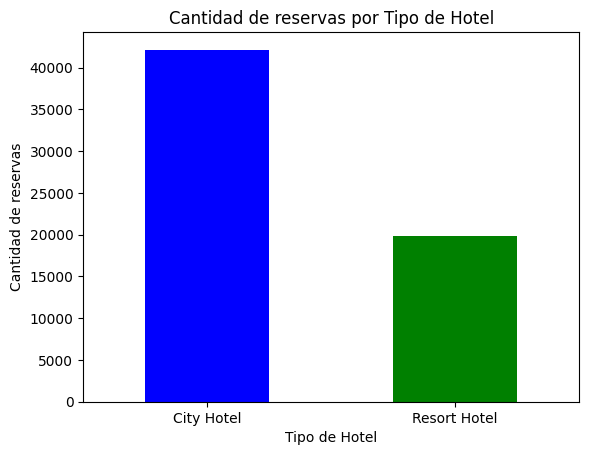

In [27]:
columna_hotel.value_counts().plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()

Observamos que la gran mayoria de reservas(exactamente 42129 reservas) se dieron en los llamados 'city hotel', mientras que el resto de reservas(19784) fueron en hoteles del tipo 'resort hotel'

Ahora nos interesa saber cuantas reservas se cancelaron efectivamente dependiendo del tipo de hotel que se eligio

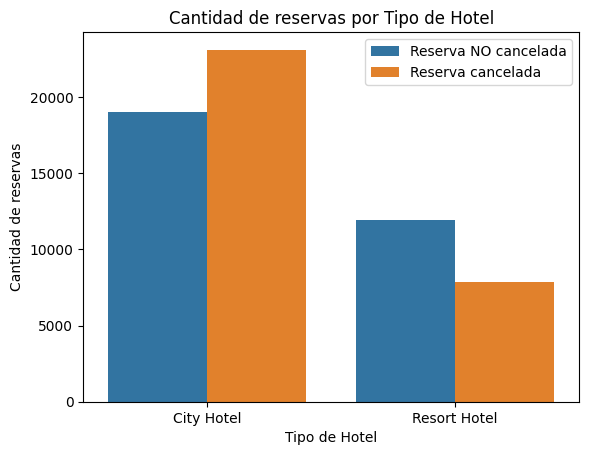

In [47]:
sns.countplot(data=ds_hoteles_train, x="hotel", hue="is_canceled")
plt.xlabel('Tipo de Hotel')
plt.ylabel('Cantidad de reservas')
plt.title('Cantidad de reservas por Tipo de Hotel')
plt.legend(labels=["Reserva NO cancelada","Reserva cancelada"])

Observamos que las reservas con hoteles del tipo 'City Hotel' tienen alrededor de 23000 reservas canceladas(mas reservas canceladas que las que NO se cancelaron). En cambio, las reservas en hoteles del tipo 'Resort Hotel' conservan alrededor de 12000 reservas que NO se cancelaron, mientras que casi 8000 reservas si se cancelaron.

Con esto, tomamos como conclusion de que las reservas que tienen un tipo de hotel 'City Hotel' tienden a ser mas canceladas que las que tienen 'Resort Hotel'. Mas adelante volveremos a comparar ciertas variables con esta.



---

# Variable lead time

Esta variable representa la cantidad de días que entre que se hizo la reserva y la fecha de entrada al hotel. Se calcula a partir de la resta del día la fecha de entrada al hotel.
Es una variable cuantitativa (int), por lo que procedemos a ver la mayor cantidad de metricas posibles (media, mediana, moda, etc)

In [14]:
columna_lead_time = ds_hoteles_train['lead_time']
columna_lead_time.describe()

count    61913.000000
mean       112.248187
std        110.717953
min          0.000000
25%         23.000000
50%         78.000000
75%        172.000000
max        629.000000
Name: lead_time, dtype: float64

Visualizamos los datos en un boxplot para poder observar una mejor distribucion de los datos

<Axes: xlabel='lead_time'>

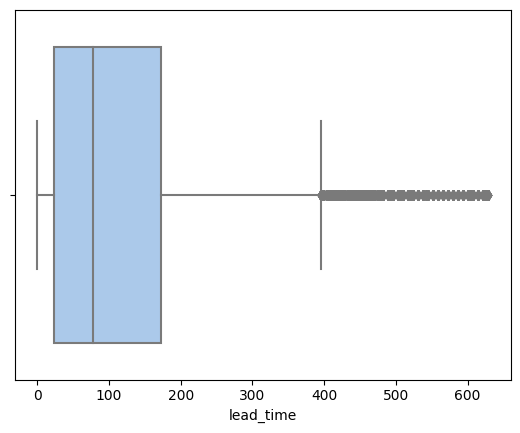

In [10]:
sns.boxplot(x = columna_lead_time, palette = "pastel")

Observamos que una mayoría de reservas tuvieron un lead_time con valor entre 50 y 150. Es decir, la mayoría de reservas se dieron entre 50 días y 150 días de anticipación.

Buscamos una relación entre el tipo de hotel de estas reservas y la variable lead_time.

<Axes: xlabel='lead_time', ylabel='hotel'>

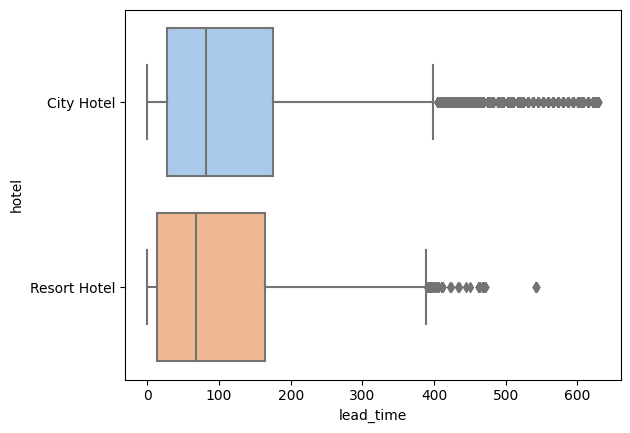

In [11]:
sns.boxplot(x = columna_lead_time, y = ds_hoteles_train["hotel"], palette = "pastel")

A partir de este gráfico y las estadísticas podemos observar que la mayoría de las reservas entre se hacen entre los 0 dias y 200 dias, con varios outliers con reservas de más de 400 dias. Observamos más detalladamente, la distribución de los datos sin los outliers y de solo los outliers

In [15]:
ds_lead_time_menor_400 = ds_hoteles_train.loc[columna_lead_time < 400]
ds_lead_time_menor_400.shape

(60621, 31)

Podemos observar que hemos filtrado solamente alrededor de 1300 columnas. Ahora observemos la distribucion de los datos para estos datos

In [16]:
ds_lead_time_menor_400["lead_time"].describe()

count    60621.000000
mean       104.600980
std         98.154945
min          0.000000
25%         22.000000
50%         74.000000
75%        165.000000
max        399.000000
Name: lead_time, dtype: float64

De nuevo, nos apoyamos en un boxplot para observar estas medidas

<Axes: xlabel='lead_time'>

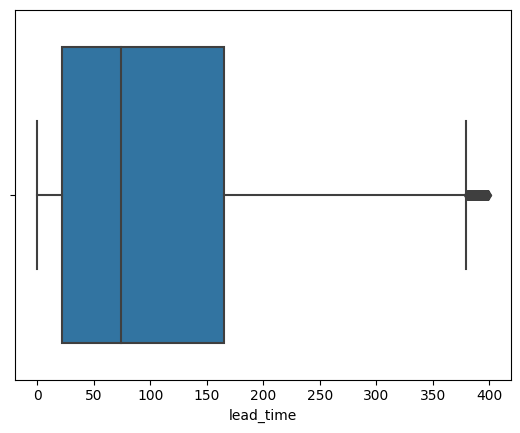

In [17]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"])

Observamos que estas reservas tuvieron un lead_time con valor entre 30 y 170 aproximadamente.

Agregamos clasificacion por el tipo de hotel

<Axes: xlabel='lead_time', ylabel='hotel'>

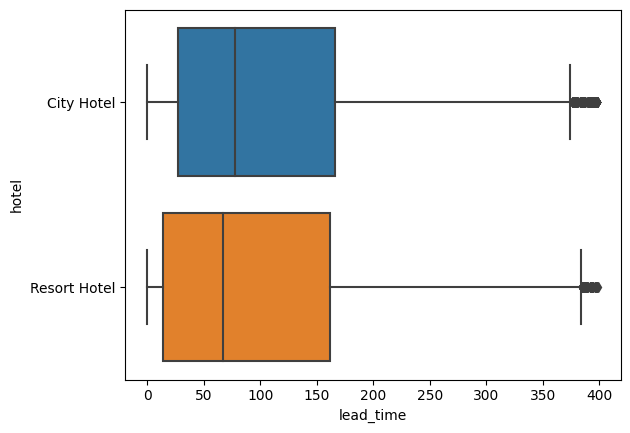

In [18]:
sns.boxplot(x = ds_lead_time_menor_400["lead_time"], y = ds_lead_time_menor_400["hotel"])

Histograma
A definir que dice????

<Axes: xlabel='lead_time', ylabel='Count'>

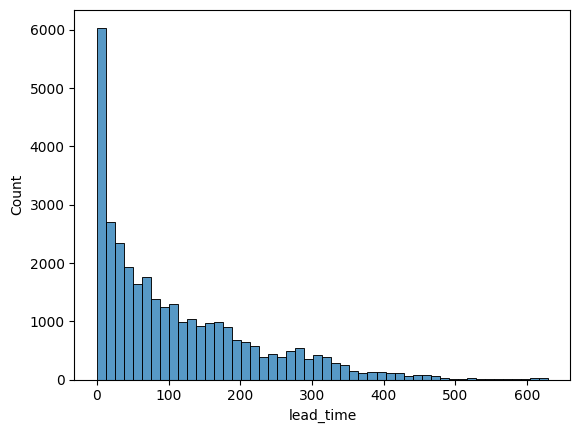

In [ ]:
sns.histplot(data = ds_hoteles_train, x = "lead_time", bins = 50)



---

# Variables arrival, day, month and year
asfa

---

# Variables adults, children y babies


Estas variables del tipo cuantitativas las analizamos juntas para ver si podemos encontrar algún patrón para las reservas con muchas personas(quizás conformadas por grupos familiares), viendo también la cantidad de adultos, niños y bebés que tuvieron las mismas.

In [ ]:
columna_adults = ds_hoteles_train['adults']
columna_adults.value_counts()

2     25122
1      6204
3      1710
0       102
4        12
5         1
40        1
20        1
6         1
26        1
Name: adults, dtype: int64

Podemos observar que la gran mayoría de reservas tienen 2 adultos, mientras que hay muy pocas que tienen más de 10 adultos.

In [ ]:
columna_adults.loc[columna_adults > 0].value_counts().sum()

33053

no todos los viajes tienen presencia de adultos!!!

In [ ]:
columna_children = ds_hoteles_train['children']
columna_children.value_counts()

0.0    30836
1.0     1283
2.0     1012
3.0       22
Name: children, dtype: int64

In [ ]:
columna_children.loc[columna_children > 0.0].value_counts().sum()

2317

Hay 4452 reservas que tuvieron niños en la misma.

In [ ]:
columna_babies = ds_hoteles_train['babies']
columna_babies.value_counts()

0    32926
1      226
2        2
9        1
Name: babies, dtype: int64

In [ ]:
columna_babies.loc[columna_babies > 0].value_counts().sum()

229

Hay 428 reservas que tuvieron bebes a bordo.



---

# Variable company

Para la columna company, que es la columna con mayores valores nulos cuales de estos son valores unicos, y cuanta cantidad hay de estos

In [ ]:
ds_hoteles_train['company'].value_counts()

40.0     206
223.0    198
67.0      95
45.0      62
153.0     52
        ... 
319.0      1
234.0      1
353.0      1
499.0      1
539.0      1
Name: company, Length: 223, dtype: int64


---

# Variable ADR

Esta variable nos dice la tarifa promedio por día de cada reserva. Nos da una idea del precio por día de alojamiento. Es una variable del tipo cuantitativa, por lo que procedemos a analizar sus medidas de resumen(media, mediana, moda, etc).

In [ ]:
columna_adr = ds_hoteles_train['adr']
columna_adr.value_counts()

62.00     1271
75.00      842
90.00      781
65.00      662
80.00      585
          ... 
114.56       1
215.10       1
117.10       1
139.14       1
53.41        1
Name: adr, Length: 4294, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles, asi que vamos a ver si para esta variable hay datos faltantes en un principio

In [ ]:
columna_adr.isna().sum()

0

Esta variable no tiene datos faltantes, por lo que no vamos a tener problemas con la misma

Ahora nos interesa saber las medidas de resumen, como la media, mediana, moda, etc..

In [ ]:
columna_adr.describe()

count    33155.000000
mean       102.276789
std         47.445782
min         -6.380000
25%         70.000000
50%         95.000000
75%        126.000000
max        426.250000
Name: adr, dtype: float64

Visualizamos estas medidas en un boxplot

<Axes: xlabel='adr'>

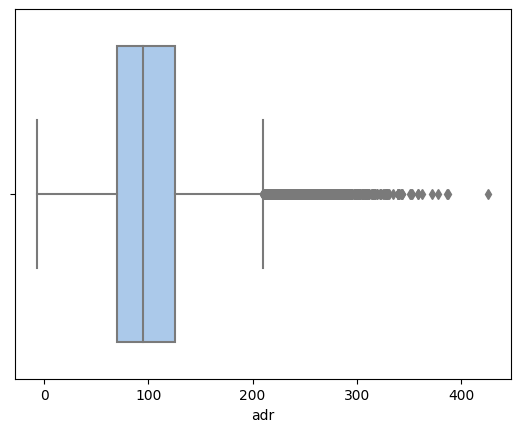

In [ ]:
sns.boxplot(x = columna_adr, palette = "pastel")

Observamos que la gran mayoria de reservas tuvieron tarifas diarias que rondaron entre los 80 y 120 (no se que moneda), mientras que hay bastantes que superaban la barrera de los 200.

Nos interesa saber ahora si podemos encontrar algun dato de importancia para esas reservas que superaron los 200

In [ ]:
ds_adr_mayor_200 = ds_hoteles_train.loc[columna_adr > 200]
ds_adr_mayor_200.shape

(1350, 31)

Hay 2574 reservas que superaron una reserva diaria de 200, ahora vamos a ver la distribucion de esas reservas

In [ ]:
ds_adr_mayor_200['adr'].describe()

count    1350.000000
mean      237.386215
std        32.257203
min       200.050000
25%       212.300000
50%       230.000000
75%       251.482500
max       426.250000
Name: adr, dtype: float64

<Axes: xlabel='adr'>

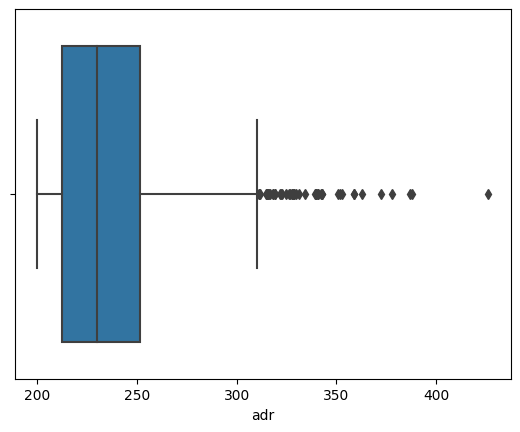

In [ ]:
sns.boxplot(x = ds_adr_mayor_200["adr"])

A estas reservas vamos a clasificarlas por el tipo de hotel

<Axes: xlabel='adr', ylabel='hotel'>

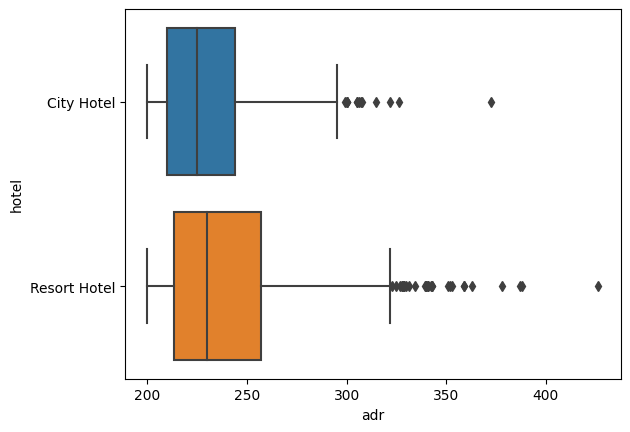

In [ ]:
sns.boxplot(x = ds_adr_mayor_200["adr"], y = ds_adr_mayor_200["hotel"])

Tomamos como conclusion que los hoteles del tipo Resort tuvieron reservas con ADR mas elevados en promedio que los del tipo City.

Vamos a partir de una hipotesis que nos puede dar un dato clave: ¿Qué relación hay entre las reservas que tuvieron un ADR mayor a 200 con las reservas canceladas?(suponiendo que al tener un valor elevado esto pudo haber generado más de una cancelación)

In [ ]:
ds_adr_mayor_200['is_canceled'].value_counts()

1.0    683
0.0    667
Name: is_canceled, dtype: int64

Acordemosnos que, según la notación usada en el DataFrame, la variable is_canceled puede tomar dos valores: 1 si, finalmente la reserva fue cancelada y 0, si la reserva no fue cancelada.

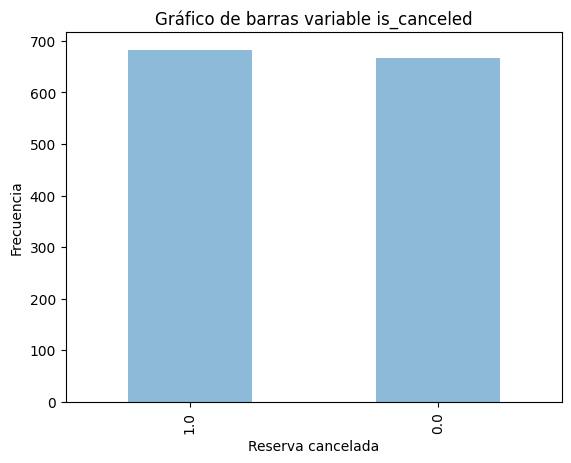

In [ ]:
grf_ds= ds_adr_mayor_200['is_canceled'].value_counts().plot.bar(alpha=0.5 , title="Gráfico de barras variable is_canceled" , xlabel="Reserva cancelada" , ylabel="Frecuencia")

Esto que obtuvimos tiene un valor muy grande: conseguimos ver que 1305 viajes con un adr mayor a 200 fueron cancelados.

Comenzamos con la Exploracion Inicial: Vamos a comenzar a analizar cada variable del dataset, considerando ciertos aspectos de interés para nuestro análisis



# Variable is_repeated_guest

Es el valor que indica si el nombre de la reserva
fue de un invitado repetido (1) o no (0).Es una variable cualitativa, por lo cual procedemos a ver qué posibles valores pueden tomar y qué tan frecuentes son

In [ ]:
ds_hoteles_train['is_repeated_guest'].value_counts()

0    32220
1      935
Name: is_repeated_guest, dtype: int64

Podemos visualizar que existen mayor cantidad de personas que no habian visitado antes el hotel que de personas que si habian visitado.
Voy a relizar un grafico de torta para poder visualizarlo mas detallado.

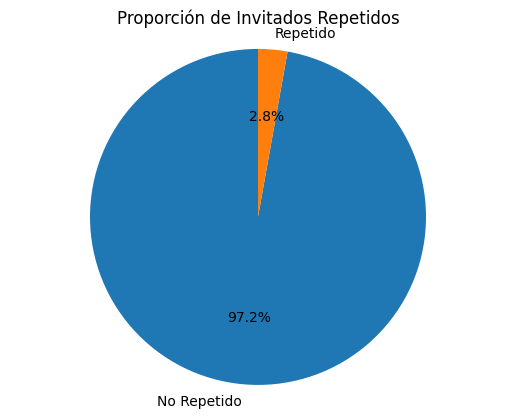

In [ ]:
repetido_counts = ds_hoteles_train['is_repeated_guest'].value_counts()
labels = ['No Repetido', 'Repetido']
plt.pie(repetido_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proporción de Invitados Repetidos')
plt.show()

Analizare si existen datos faltantes,para poder seguir con el analisis

In [ ]:
ds_hoteles_train['is_repeated_guest'].isna().sum()

0

Procedere a analizar,junto a las otras variables,a buscar correlacion entre ellas;y la primer variable que puede tener una conexion con la misma es la variable hotel.
La usare para calcular la proporción de invitados repetidos en cada tipo de hotel. Esto te ayudará a comprender si la proporción de invitados repetidos varía según el tipo de hotel.

In [ ]:
proporcion_por_tipo_de_hotel = ds_hoteles_train.groupby('hotel')['is_repeated_guest'].mean()* 100
print(proporcion_por_tipo_de_hotel)

hotel
City Hotel      2.358657
Resort Hotel    3.813600
Name: is_repeated_guest, dtype: float64


Estos resultados nos muestran que:


*  En el "City Hotel," aproximadamente el 2.31% de los invitados son repetidos
* En el "Resort Hotel," aproximadamente el 3.85% de los invitados son repetidos.  


Estos resultados sugieren que el "Resort Hotel" tiene una proporción más alta de invitados repetidos en comparación con el "City Hotel.
Lo veremos en un grafico

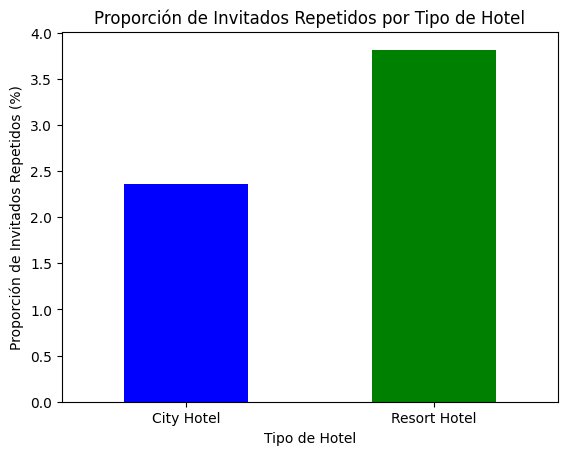

In [ ]:


proporcion_por_tipo_de_hotel.plot(kind='bar', color=['blue', 'green'])
plt.xlabel('Tipo de Hotel')
plt.ylabel('Proporción de Invitados Repetidos (%)')  # Agregar (%) al título del eje y
plt.title('Proporción de Invitados Repetidos por Tipo de Hotel')
plt.xticks(rotation=0)
plt.show()



Voy a ver como esta relacionada la variable con las cancelaciones

In [ ]:
repetidos_df = ds_hoteles_train[ds_hoteles_train['is_repeated_guest'] == 1]
no_repetidos_df = ds_hoteles_train[ds_hoteles_train['is_repeated_guest'] == 0]



En estos nuevos dataframes,tengo separado los clientes repetidos y ls no repetidos ,y a continuacion voy a ver en un grafico si la cancelaciones tienen una conexion con las cancelaciones

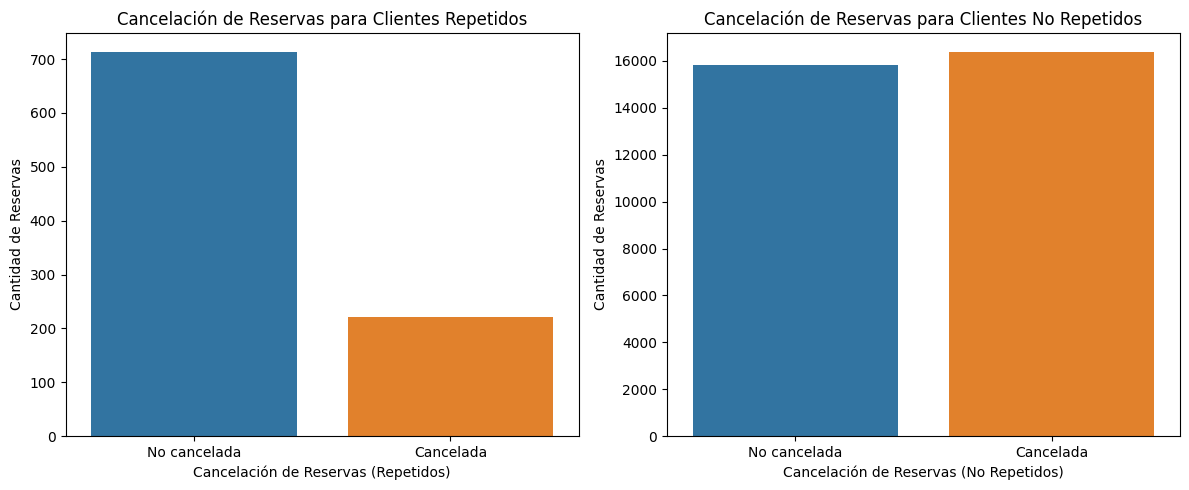

In [ ]:
# Crear dos gráficos de barras separados
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.subplot(1, 2, 2)
sns.countplot(data=no_repetidos_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas (No Repetidos)')
plt.ylabel('Cantidad de Reservas')
plt.title('Cancelación de Reservas para Clientes No Repetidos')
plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x



plt.tight_layout()
plt.show()

A simple vista con los clientes no repetidos no existe mucha relacion entre las cancelaciones,mientras que los clientes repetidos tienden a no cancelar las reservas por encima de las canceladas

# Variable CustomerType

Esta variable se refiere al tipo de reservas que se realizaron,es una variable cualitativa y vamos a ver como se distribuye en los datos

In [ ]:
ds_hoteles_train['customer_type'].value_counts()

Transient          25270
Transient-Party     6647
Contract            1090
Group                148
Name: customer_type, dtype: int64

Lo voy a ilustrar en un grafico de torta para poder visualizar mejor su distribucion:

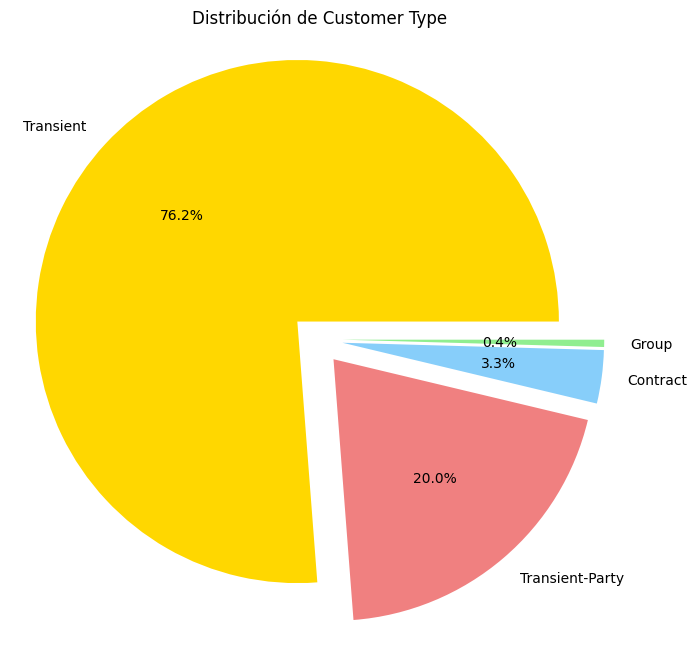

In [ ]:


customer_type_counts = ds_hoteles_train['customer_type'].value_counts()

# Configuración para hacer que el gráfico de torta sea más legible
explode = (0.1, 0.1, 0.1, 0.1)  # Separación de las porciones
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colores

# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(customer_type_counts, labels=customer_type_counts.index, explode=explode, colors=colors,
        autopct='%1.1f%%')
plt.title('Distribución de Customer Type')
plt.axis('equal')  # Hace que el gráfico de torta sea circular

plt.show()






Ahora voy a ver como se relacionan estos tipos de contrato con las cancelaciones,a continuacion analizo el tipo Transient ver si se debe al tipo de reservas son

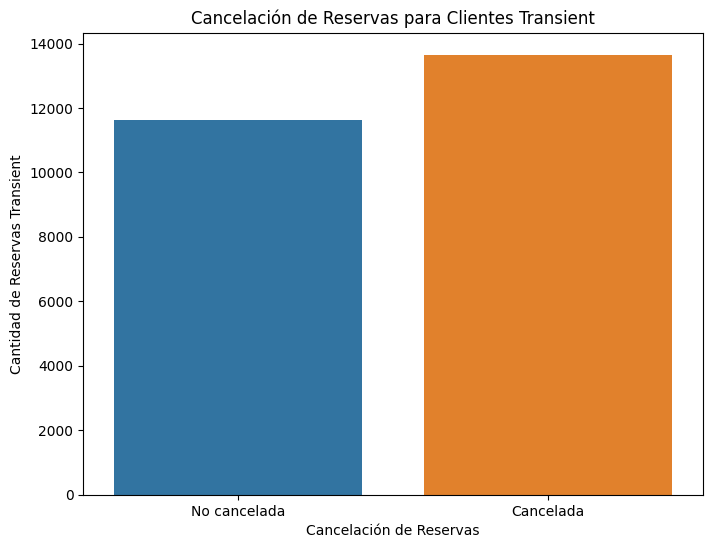

In [ ]:
transient_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Transient']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient')
plt.title('Cancelación de Reservas para Clientes Transient')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Apaentemente los clientes Transient que cancelaron son mayores que los que no cancelaron,ahora vere con el tipo Transient-party


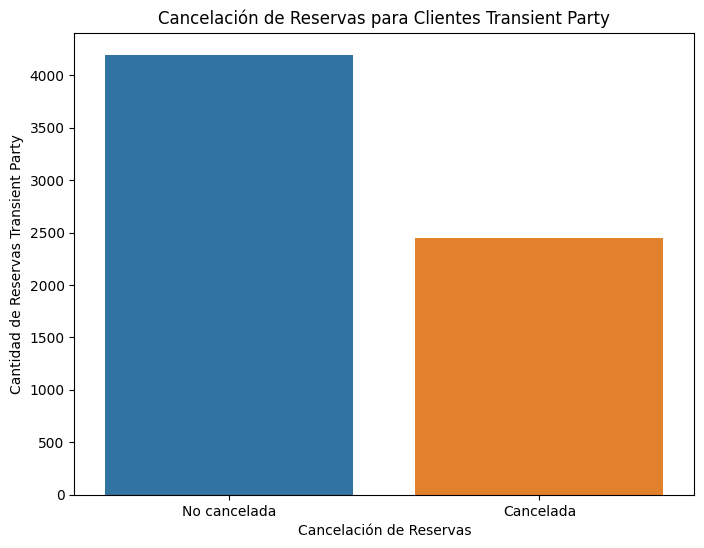

In [ ]:
transient_party_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Transient-Party']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=transient_party_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Transient Party')
plt.title('Cancelación de Reservas para Clientes Transient Party')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Apaentemente los clientes Transient Party que cancelaron son menores que los que no cancelaron,ahora vere con el tipo Contract


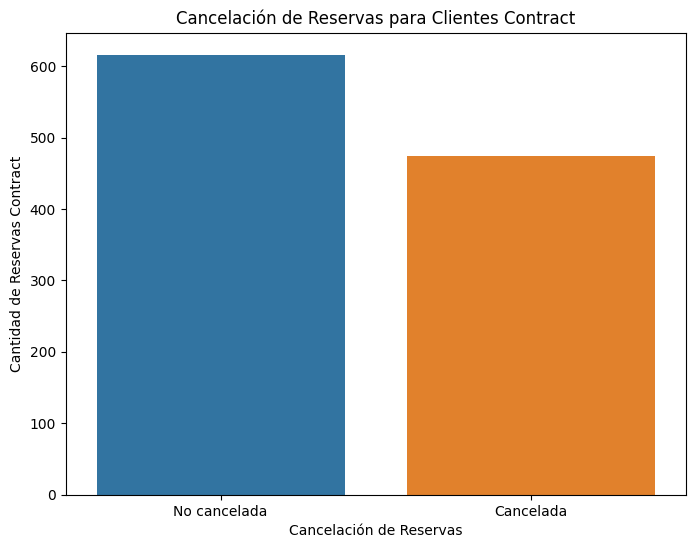

In [ ]:
contract_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Contract']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=contract_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Contract')
plt.title('Cancelación de Reservas para Clientes Contract')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Ahora vere con el tipo Group


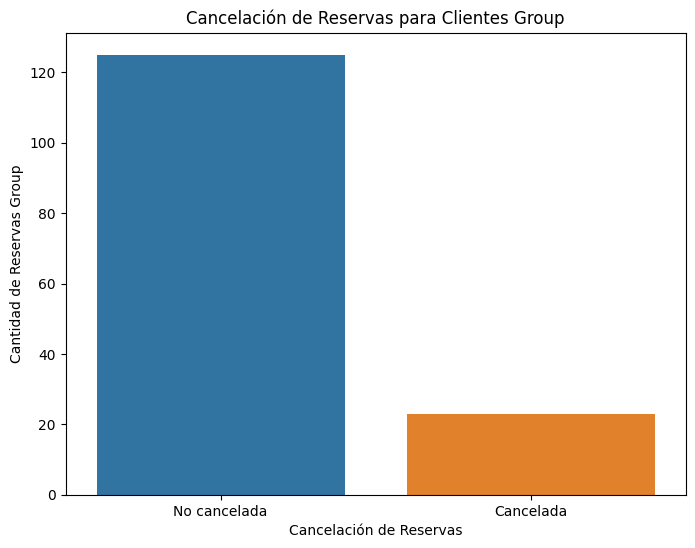

In [ ]:
group_df = ds_hoteles_train[ds_hoteles_train['customer_type'] == 'Group']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=group_df, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas Group')
plt.title('Cancelación de Reservas para Clientes Group')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Juntare los graficos:

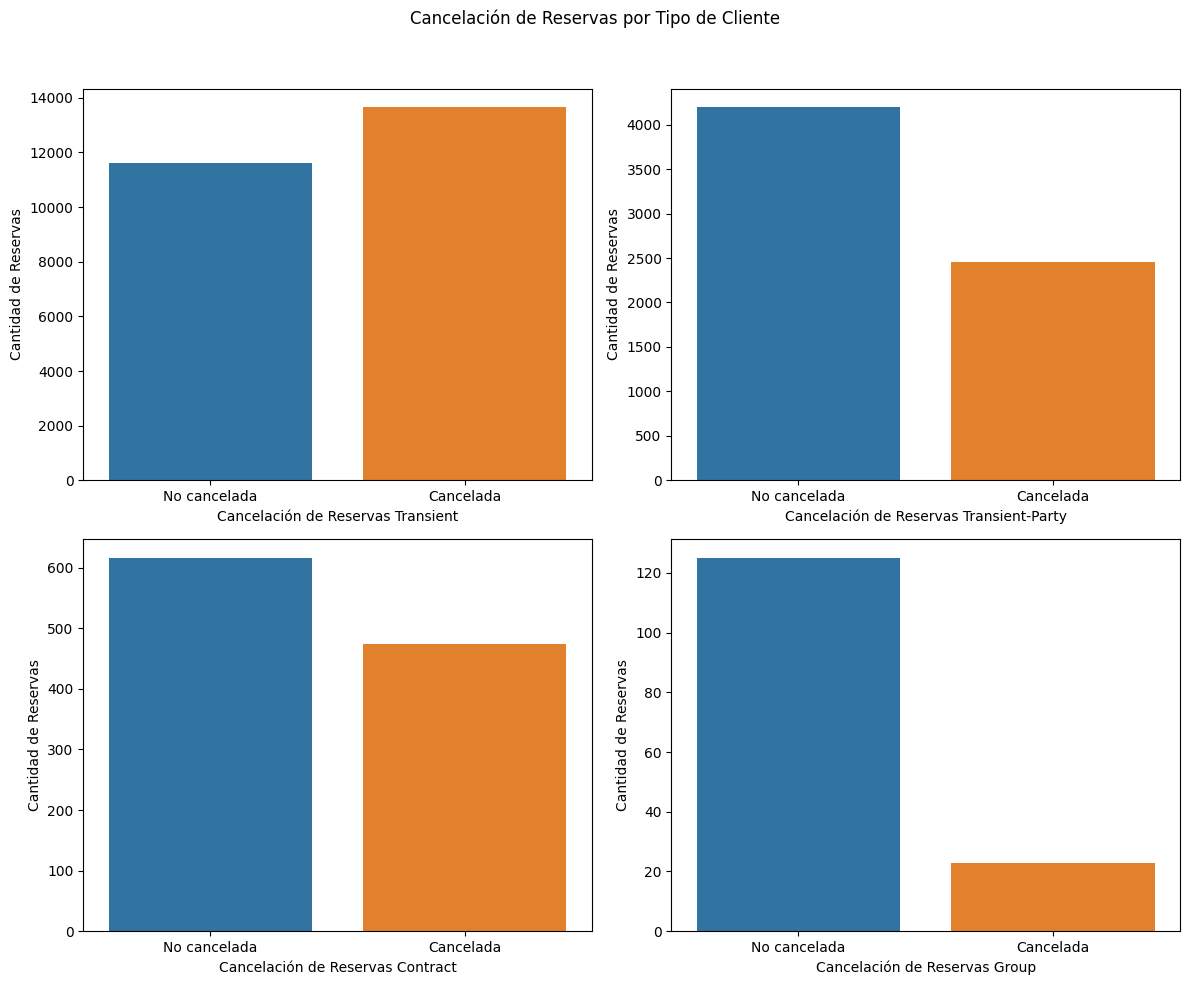

In [ ]:

# Crear un conjunto de subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Cancelación de Reservas por Tipo de Cliente')

# Crear gráficos de barras para cada tipo de cliente en su respectivo subgráfico
sns.countplot(data=transient_df, x='is_canceled', ax=axes[0, 0])
axes[0, 0].set_xlabel('Cancelación de Reservas Transient')
axes[0, 0].set_ylabel('Cantidad de Reservas')
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=transient_party_df, x='is_canceled', ax=axes[0, 1])
axes[0, 1].set_xlabel('Cancelación de Reservas Transient-Party')
axes[0, 1].set_ylabel('Cantidad de Reservas')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=contract_df, x='is_canceled', ax=axes[1, 0])
axes[1, 0].set_xlabel('Cancelación de Reservas Contract')
axes[1, 0].set_ylabel('Cantidad de Reservas')
axes[1, 0].set_xticks([0, 1])
axes[1, 0].set_xticklabels(['No cancelada', 'Cancelada'])

sns.countplot(data=group_df, x='is_canceled', ax=axes[1, 1])
axes[1, 1].set_xlabel('Cancelación de Reservas Group')
axes[1, 1].set_ylabel('Cantidad de Reservas')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['No cancelada', 'Cancelada'])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Variable Booking Changes


Es una variable que describe el número de cambios/enmiendas realizadas
a la reserva desde el momento en que
la reserva se introdujo en el PMS hasta
el momento del check-in o cancelación

In [ ]:
columna_booking_changes = ds_hoteles_train['booking_changes']


columna_booking_changes.value_counts()

0     28686
1      3128
2       968
3       224
4        85
5        32
6        14
7         8
8         3
10        2
13        1
12        1
9         1
14        1
15        1
Name: booking_changes, dtype: int64

Como es de esperarse, esta variable contiene muchos valores posibles, asi que vamos a ver si para esta variable hay datos faltantes en un principio

In [ ]:
columna_booking_changes.isna().sum()

0

Esta variable no tiene datos faltantes, por lo que no vamos a tener problemas con la misma

Ahora,dado que es una variable cuantitativa,veremos las medidas de resumen, como la media, mediana, moda, etc..

In [ ]:
columna_booking_changes.describe()

count    33155.000000
mean         0.195536
std          0.601905
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: booking_changes, dtype: float64

Veo que predominan las reservas que no tuvieron ningun cambio,pero veamos aquellas que si tuvieron


In [ ]:
ds_reservas_con_cambios = ds_hoteles_train.loc[columna_booking_changes > 0]

ds_reservas_con_cambios['booking_changes'].describe()

count    4469.000000
mean        1.450660
std         0.931202
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: booking_changes, dtype: float64

Lo visualizo en un bloxplot

<Axes: xlabel='booking_changes'>

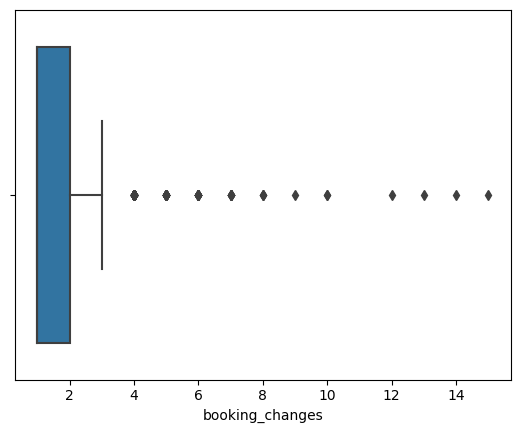

In [ ]:
sns.boxplot(x = ds_reservas_con_cambios['booking_changes'])

Veamos la relacion con is_canceled

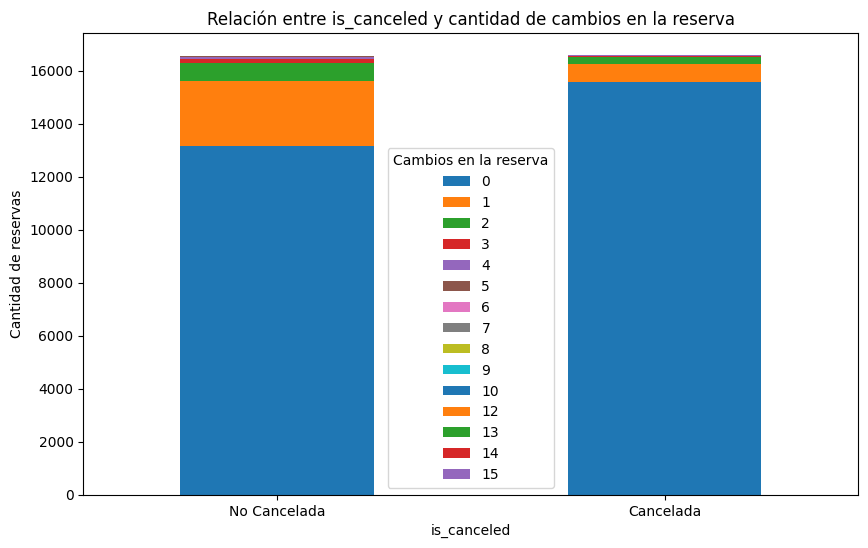

In [ ]:

# Agrupar el DataFrame por 'is_canceled' y contar la cantidad de cada valor en 'cambios_reserva'
pivot_df = ds_hoteles_train.groupby(['is_canceled', 'booking_changes']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('is_canceled')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'], rotation=0)
plt.title('Relación entre is_canceled y cantidad de cambios en la reserva')
plt.legend(title='Cambios en la reserva')
plt.show()


# Variable DaysInWaitingList

Es una variable cuantitativa que describe el número de días que la reserva estuvo en el
lista de espera antes de que fuera confirmado
el cliente.Veamos que valores toman :

In [ ]:
columna_daysinwaitinglist = ds_hoteles_train['days_in_waiting_list']

columna_daysinwaitinglist.value_counts()



0      31964
39        85
31        58
44        46
46        41
       ...  
175        1
121        1
97         1
259        1
150        1
Name: days_in_waiting_list, Length: 107, dtype: int64

Visualizemos en un grafico

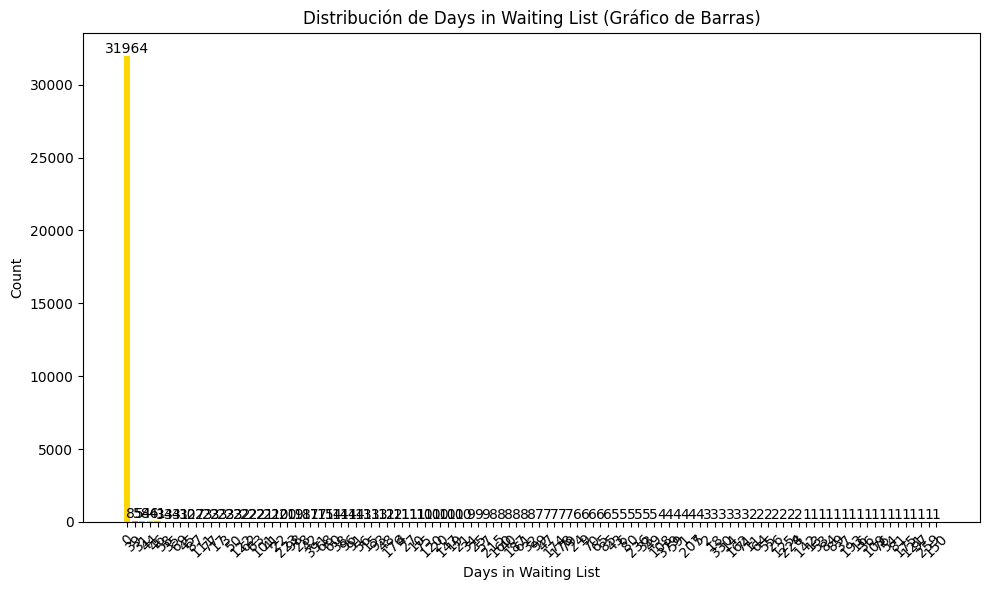

In [ ]:
days_in_waiting_list_count = columna_daysinwaitinglist.value_counts()
values = days_in_waiting_list_count.values
labels = days_in_waiting_list_count.index

# Configuración para hacer que el gráfico de barras sea más legible
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']  # Colores
x = range(len(labels))

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(x, values, color=colors)
plt.xticks(x, labels, rotation=45)
plt.xlabel('Days in Waiting List')
plt.ylabel('Count')
plt.title('Distribución de Days in Waiting List (Gráfico de Barras)')

# Agregar etiquetas con los valores en las barras
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Podemos notar la gran presencia de reservas qe no estuvieron en lista de espera,analizare por separado aquellas que al menos estuvieron,1 dia de espera ,para ver el resumen de la misma


In [ ]:
ds_days_in_waiting_list = ds_hoteles_train.loc[columna_daysinwaitinglist > 1]

ds_days_in_waiting_list.shape

(1187, 31)

Existen 2229 reservas que al menos tuvieron un dia dentro de la lista de espera,veamos sus medias,medianas,etc

In [ ]:
ds_days_in_waiting_list['days_in_waiting_list'].describe()

count    1187.000000
mean       70.203033
std        65.560214
min         2.000000
25%        35.000000
50%        47.000000
75%        87.000000
max       391.000000
Name: days_in_waiting_list, dtype: float64

Veamos en que proporcion estas reservas cancelan

In [ ]:
ds_days_in_waiting_list['is_canceled'].value_counts()

1.0    885
0.0    302
Name: is_canceled, dtype: int64

Veamos en un grafico

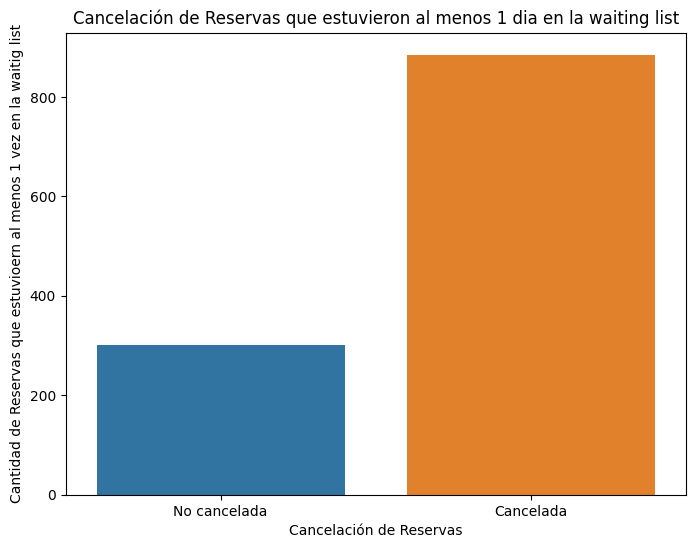

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_days_in_waiting_list, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas que estuvioern al menos 1 vez en la waitig list')
plt.title('Cancelación de Reservas que estuvieron al menos 1 dia en la waiting list')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Podemos notar como el hecho de estar en lista de espera puede afectar a la canecelacion

Haremos lo msimo con aquellas que no estuvieron en lista de espera

In [ ]:
ds_0_days_in_waiting_list = ds_hoteles_train.loc[columna_daysinwaitinglist < 1]

ds_0_days_in_waiting_list.shape

(31964, 31)

Veamos como se distribuyen las cancelaciones


In [ ]:
ds_0_days_in_waiting_list['is_canceled'].value_counts()

0.0    16249
1.0    15714
Name: is_canceled, dtype: int64

Veamos en un grafico,que sera muy parecido

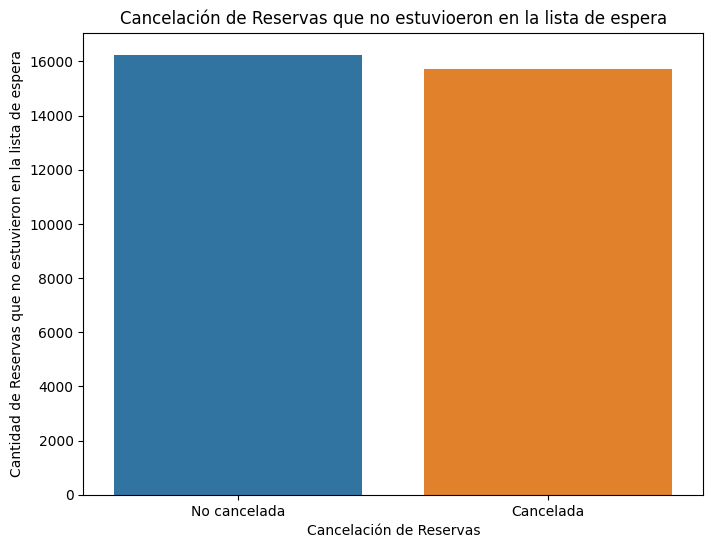

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_0_days_in_waiting_list, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Cantidad de Reservas que no estuvieron en la lista de espera')
plt.title('Cancelación de Reservas que no estuvioeron en la lista de espera')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

# Variable DepositType

Es una variable cualitativa que nos da una
Indicación sobre si el cliente realizó un
depósito para garantizar la reserva,asi que veamos que errores puede tomar

In [ ]:
columna_deposit = ds_hoteles_train['deposit_type']

columna_deposit.value_counts()

No Deposit    27666
Non Refund     5444
Refundable       45
Name: deposit_type, dtype: int64

Veamoslo en un grafico para las distribucion

(-1.0999998549079926,
 1.0999999930908568,
 -1.0999998643276612,
 1.0999999489666807)

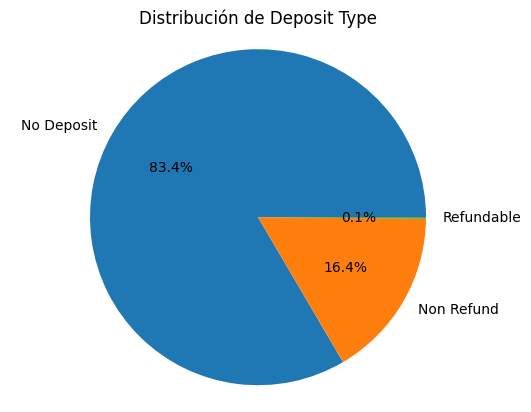

In [ ]:
plt.pie(columna_deposit.value_counts(),labels=columna_deposit.value_counts().index,
       autopct='%1.1f%%' )
plt.title('Distribución de Deposit Type')
plt.axis('equal')  # Hace que el gráfico de torta sea circular


Veamos si tiene algun dato faltante para poder seguir con el analisis


In [ ]:
columna_deposit.isna().sum()

0

Analizemos variable a variable con respecto a la variable is canceled

In [ ]:
ds_deposit_no_deposit = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'No Deposit']
ds_deposit_non_refund = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'Non Refund']
ds_deposit_refundable = ds_hoteles_train[ds_hoteles_train['deposit_type'] == 'Refundable']

Veamos en grafico uno por uno

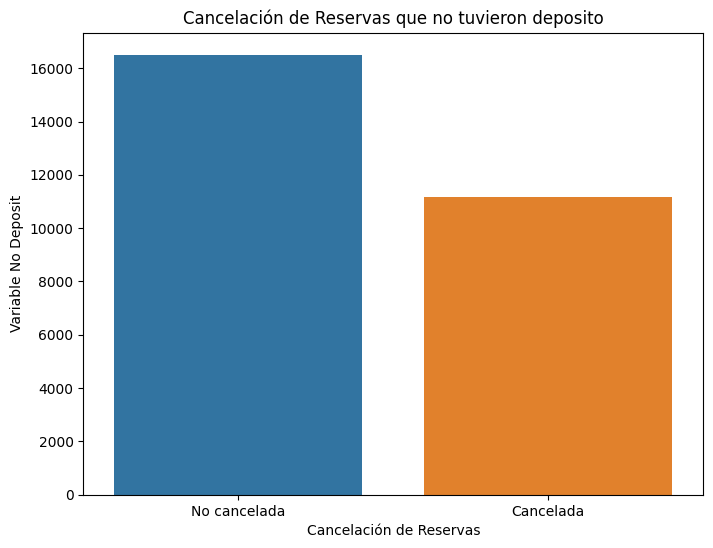

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_no_deposit, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable No Deposit')
plt.title('Cancelación de Reservas que no tuvieron deposito')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

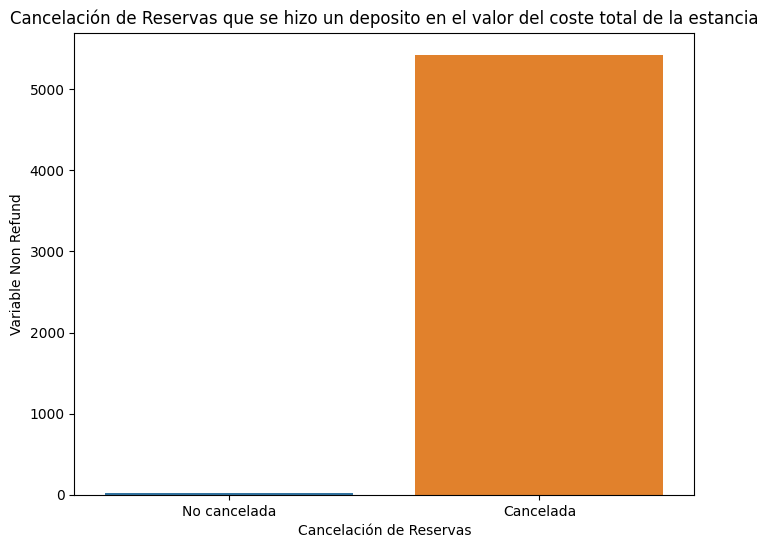

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_non_refund, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable Non Refund')
plt.title('Cancelación de Reservas que se hizo un deposito en el valor del coste total de la estancia')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

Este grafico me llama la atencion,luego veremos mas en fondo

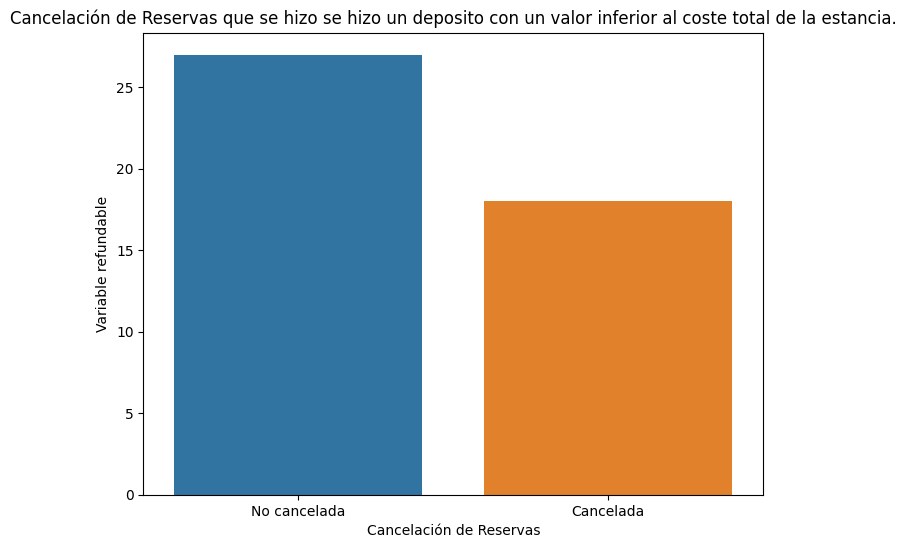

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_deposit_refundable, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Variable refundable')
plt.title('Cancelación de Reservas que se hizo se hizo un deposito con un valor inferior al coste total de la estancia.')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()

# Variable DistributionChannel

Esta variable cualitativa que muestra el canal de distribución de reservas. El término
“TA” significa “Agentes de Viajes” y “TO”
significa “operadores turísticos”.
Veamos como se distribuye

In [ ]:
columna_distribution_channel = ds_hoteles_train['distribution_channel']

columna_distribution_channel.value_counts()

TA/TO        27838
Direct        3571
Corporate     1685
GDS             59
Undefined        2
Name: distribution_channel, dtype: int64

Veamos si tiene un valor nulo


In [ ]:
columna_distribution_channel.isna().sum()

0

No tiene datos vacios,nos queda en incognita por decifrar sobre los tipos Undefined,pero veamos esto en un grafico de torta

(-1.0999999037255406,
 1.0999999336739497,
 -1.099999836294037,
 1.099999992204478)

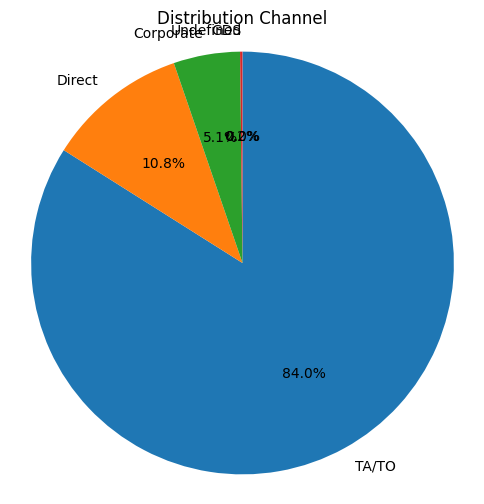

In [ ]:

plt.figure(figsize=(6, 6))

plt.pie(columna_distribution_channel.value_counts(),labels=columna_distribution_channel.value_counts().index,
       autopct='%1.1f%%', startangle=90, counterclock=False )
plt.title('Distribution Channel')
plt.axis('equal')  # Hace que el gráfico de torta sea circular

Vamos a considerar la variable TA/TO como la variable a analizar,veamos como se distribuyen con la variable is_canceled

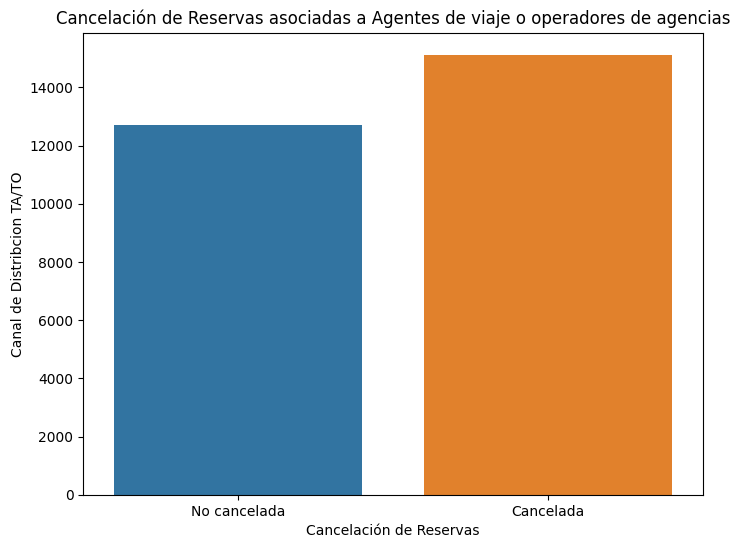

In [ ]:
ds_distribution_ta_to = ds_hoteles_train[ds_hoteles_train['distribution_channel'] == 'TA/TO']

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=ds_distribution_ta_to, x='is_canceled')
plt.xlabel('Cancelación de Reservas')
plt.ylabel('Canal de Distribcion TA/TO')
plt.title('Cancelación de Reservas asociadas a Agentes de viaje o operadores de agencias')

plt.xticks([0, 1], ['No cancelada', 'Cancelada'])  # Etiquetas para el eje x

plt.show()


# Variable TotalOfSpecialRequests

Esta variable indica el total de solicitudes especiales de la reserva,veamos como se comporta la variable

In [ ]:
columna_total_special_request = ds_hoteles_train['total_of_special_requests']

columna_total_special_request.describe()

count    33155.000000
mean         0.521068
std          0.772991
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

Veamos si tiene algun valor faltane que pueda afectar a nuestro futuro analisis

In [ ]:
columna_total_special_request.isna().sum()

0

No tiene valores faltanets por lo cual podemos seguir,veamos como se distribuyen,sabiendo que su promedio es de 0.521068

In [ ]:
columna_total_special_request.value_counts()

0    20745
1     8341
2     3368
3      614
4       78
5        9
Name: total_of_special_requests, dtype: int64

Dado estos datos , vamos a ver como se distribuyen con la variable is_canceled

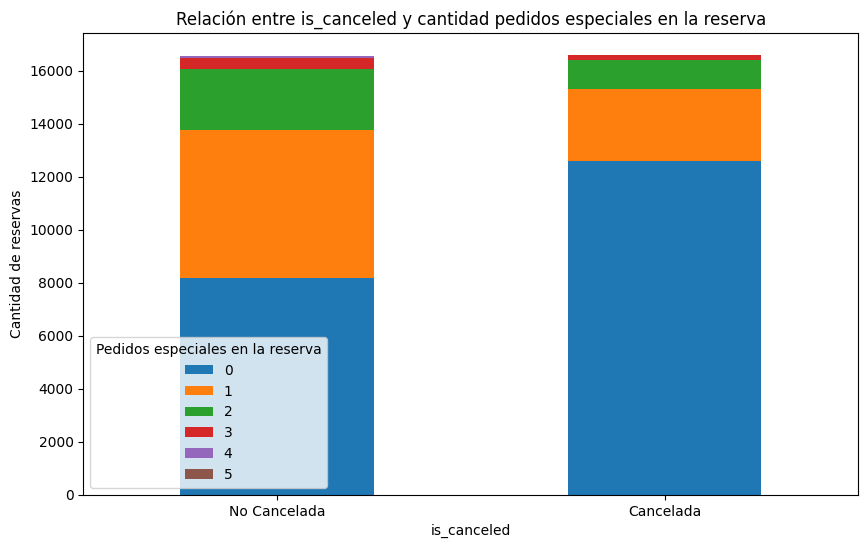

In [ ]:

pivot_special_request = ds_hoteles_train.groupby(['is_canceled', 'total_of_special_requests']).size().unstack(fill_value=0)

# Crear el gráfico de barras apiladas
ax = pivot_special_request.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('is_canceled')
plt.ylabel('Cantidad de reservas')
plt.xticks([0, 1], ['No Cancelada', 'Cancelada'], rotation=0)
plt.title('Relación entre is_canceled y cantidad pedidos especiales en la reserva')
plt.legend(title='Pedidos especiales en la reserva')
plt.show()